In [1]:
import os
import cv2
from matplotlib.pyplot import imshow
import numpy as np
import glob

In [2]:
pasta_atual = os.getcwd()
pasta = pasta_atual + '/robocup2_menosbrilho'

entrada = list()

fotos = glob.glob(pasta + '/*.png')
maisfotos = glob.glob(pasta+ '/*.jpg')
for nome in maisfotos:
    fotos.append(nome)
fotosjpeg = glob.glob(pasta + '/*.jpeg')
for nome in fotosjpeg:
    fotos.append(nome)
fotosJPG = glob.glob(pasta + '/*.JPG')
for nome in fotosJPG:
    fotos.append(nome)
fotos.sort()

for arquivo in fotos:
    img = (cv2.imread(arquivo))
    entrada.append(img)

In [3]:
print(fotos[0])

/home/lucas/Desktop/Conjunto de treino/robocup2_menosbrilho/frame0049.jpg


In [5]:
def adjust_gamma(image, gamma=1.0):
    # build a lookup table mapping the pixel values [0, 255] to
    # their adjusted gamma values
    invGamma = 1.0 / gamma
    table = np.array([((i / 255.0) ** invGamma) * 255
        for i in np.arange(0, 256)]).astype("uint8")
 
    # apply gamma correction using the lookup table
    return cv2.LUT(image, table)

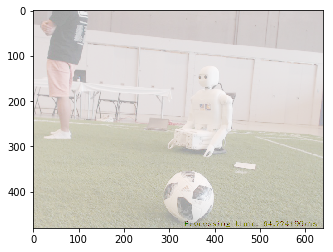

In [15]:
img = cv2.cvtColor(entrada[0], cv2.COLOR_BGR2RGB)
img = adjust_gamma(img, 6)
img = np.array(img)
img = img.astype(float)
img = img/255
imshow(img)

### Diminuição de Brilho

In [4]:
i = 0
for imagem in entrada:
    hsv = cv2.cvtColor(imagem, cv2.COLOR_BGR2HSV)
    hsv[:,:,2]  = hsv[:,:,2]/2
    final = cv2.cvtColor(hsv, cv2.COLOR_HSV2BGR)
    cv2.imwrite(fotos[i], final)
    i = i +1

### Aumento de brilho

In [6]:
i = 0
for imagem in entrada:
    rgb = cv2.cvtColor(imagem, cv2.COLOR_BGR2RGB)
    rgb = adjust_gamma(rgb, 6)
    final = cv2.cvtColor(rgb, cv2.COLOR_RGB2BGR)
    cv2.imwrite(fotos[i], final)
    i = i +1

### Mudança de cor #1

In [11]:
i = 0
for imagem in entrada:
    hsv = cv2.cvtColor(imagem, cv2.COLOR_BGR2RGB)
    hsv[:,:,0]  = ((hsv[:,:,1]/255)**1.5)*255
    final = cv2.cvtColor(hsv, cv2.COLOR_RGB2BGR)
    cv2.imwrite(fotos[i], final)
    i = i +1

### Mudança de cor #2

In [4]:
i = 0
for imagem in entrada:
    hsv = cv2.cvtColor(imagem, cv2.COLOR_BGR2RGB)
    hsv[:,:,1]  = ((hsv[:,:,1]/255)**1.5)*255
    final = cv2.cvtColor(hsv, cv2.COLOR_RGB2BGR)
    cv2.imwrite(fotos[i], final)
    i = i +1

### Mudança de cor #3

In [4]:
i = 0
for imagem in entrada:
    hsv = cv2.cvtColor(imagem, cv2.COLOR_BGR2RGB)
    hsv[:,:,2] = ((hsv[:,:,2]/255)**1.5)*255
    final = cv2.cvtColor(hsv, cv2.COLOR_RGB2BGR)
    cv2.imwrite(fotos[i], final)
    i = i +1

### Motion Blur

In [4]:
i = 0
size = 50

kernel_motion_blur = np.zeros((size, size))
kernel_motion_blur[int((size-1)/2), :] = np.ones(size)
kernel_motion_blur = kernel_motion_blur / size

for imagem in entrada:
    final = cv2.filter2D(imagem, -1, kernel_motion_blur)
    cv2.imwrite(fotos[i], final)
    i = i +1